For this project, I wanted to analyze all of Lionel Messi's goals and gather insights on when he scored, the type of goal he scored, and who assisted the goal.

I collected my data from https://www.transfermarkt.us/lionel-messi/alletore/spieler/28003/saison//verein/0/liga/0/wettbewerb//pos/0/trainer_id/0/minute/0/torart/0

The raw data from Trasnfermarkt is stored in 'raw_data.csv'
The cleaned data is stored in 'clean_data.csv'

In [2]:
import pandas as pd

df=pd.read_csv('raw_data.csv') 
df.head(10)

,Season,Competition,Matchday,Date,Home/Away,Opponent,Result,Position,Minute,Score,Type,Assist
0,Season 04/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,LaLiga,34,5/1/2005,H,Albacete (19.),2:00,CF,90'+1,2:00,Left-footed shot,Ronaldinho
2,Season 05/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Champions League,Group Stage,11/2/2005,H,Panathinaikos,5:00,RW,34',3:00,Left-footed shot,NaN
4,NaN,LaLiga,13,11/27/2005,H,Racing (18.),4:01,RW,51',2:00,Left-footed shot,Samuel Eto'o
5,NaN,LaLiga,19,1/15/2006,H,Athletic (19.),2:01,RW,50',2:01,Left-footed shot,Mark van Bommel
6,NaN,LaLiga,20,1/22/2006,H,Alavés (20.),2:00,CF,82',2:00,Left-footed shot,Ronaldinho
7,NaN,LaLiga,21,1/29/2006,A,RCD Mallorca (17.),0:03,CF,75',0:02,Right-footed shot,Sylvinho
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83',0:03,Left-footed shot,Ronaldinho
9,NaN,Copa del Rey,Quarter-Finals,2/1/2006,H,Real Zaragoza,2:01,CF,42',1:00,Header,Ludovic Giuly


This raw data was then cleaned and manipulated so that it could be used in my visualization. In short, I removed rows containing the word 'Season' and removed any columns that did not contain information that I would use in my visualization.

For my first visualization, I was interesting in seeing when Messi scores his goals. Does he score more often at the beginning of games? Toward the end? Is the distribution relatively even? 

From the visualization below, we can see that he scores more goals toward the end of games. 

We can infer that during a game, Messi may take a while to warm up and feel comfortable and/or that he is a clutch player that scores late, deciding goals.

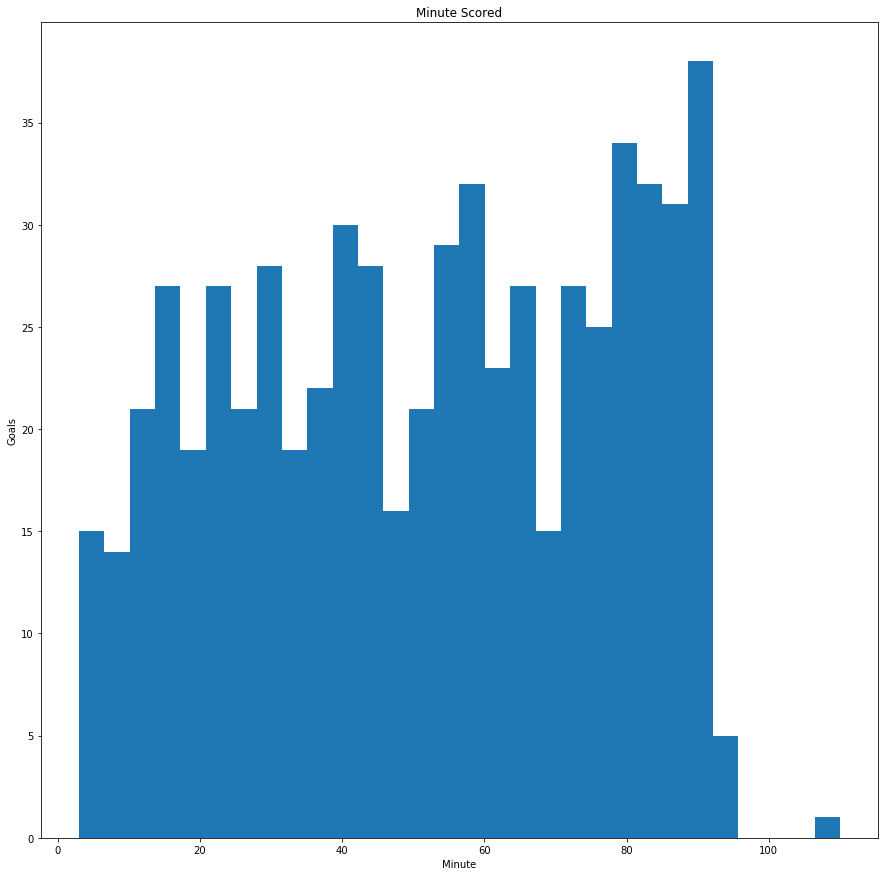

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x=pd.read_csv('clean_data.csv') 

plt.figure(figsize=(15,15))

plt.hist(x['Minute'], bins=30)

plt.title('Minute Scored')

plt.xlabel('Minute')
plt.ylabel('Goals')

plt.show()

For my second visualization, I was interesting in seeing what type of goals Messi scores. What percentage of his goals are left-footed shots? Right-footed shots? Penalties? etc...

From the visualization below, we can see that the vast majority of his goals are left-footed shots.

We can infer that Messi is a left-footed player that relies heavily on his left-footed shot, and has a comparatively weaker right-footed shot. We can infer that he is a talented free kick taker and not a great penalty kick taker because his proportion of free kick goals is close to his proportion of penalty kicks.

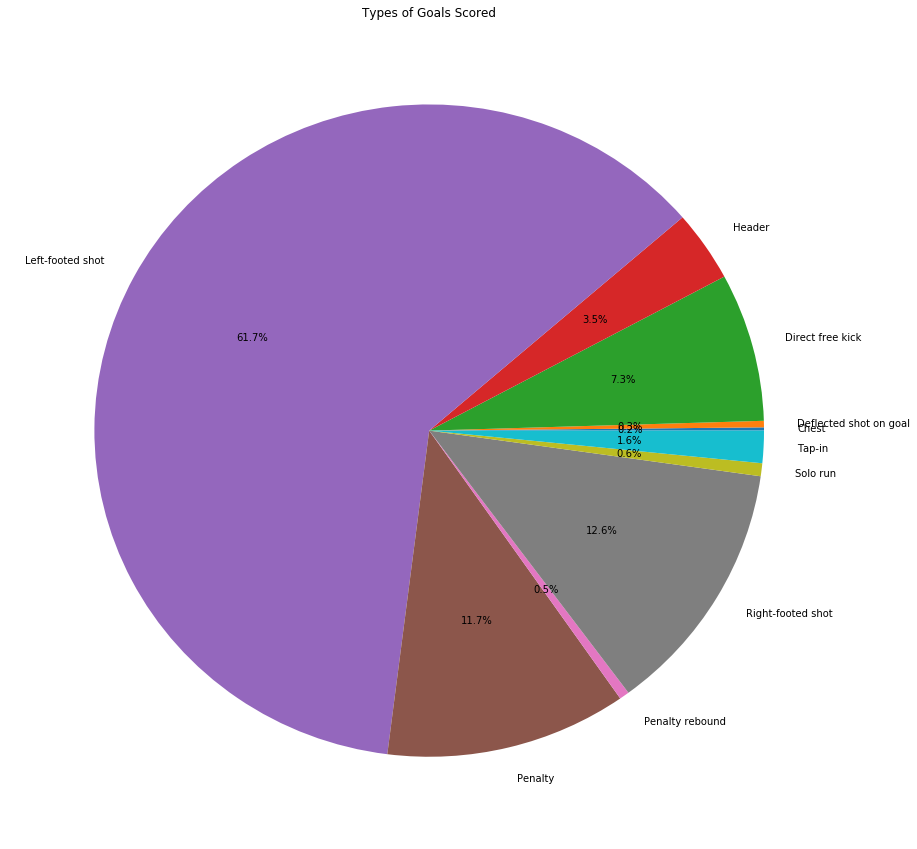

In [4]:
import csv

goalType = []
with open("clean_data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
      goalType.append(lines[1])

goalTypeClean = []
for i in goalType:
    if i not in goalTypeClean and i is not '':
        goalTypeClean.append(i)
        
numGoals = []
for i in goalTypeClean:
    numGoals.append(goalType.count(i))
    
plt.figure(figsize=(15,15))    
plt.pie(numGoals, labels=goalTypeClean, autopct="%.1f%%")
plt.title("Types of Goals Scored")
plt.show()

For my third visualization, I was interesting in seeing which players have assisted Messi's goals. Which players have assisted the most goals? Do some players assist much more often than others? I decided to only look at players that had assisted Messi more than 5 times to improve the clarity of the graph.

From the visualization below, we can see that Luis Suarez, Dani Alves,Andres Iniesta, and Xavi have assisted the most goals.

We can infer that these players have played the most games with Messi, play near him on the field, and/or are talented players in their own right. 

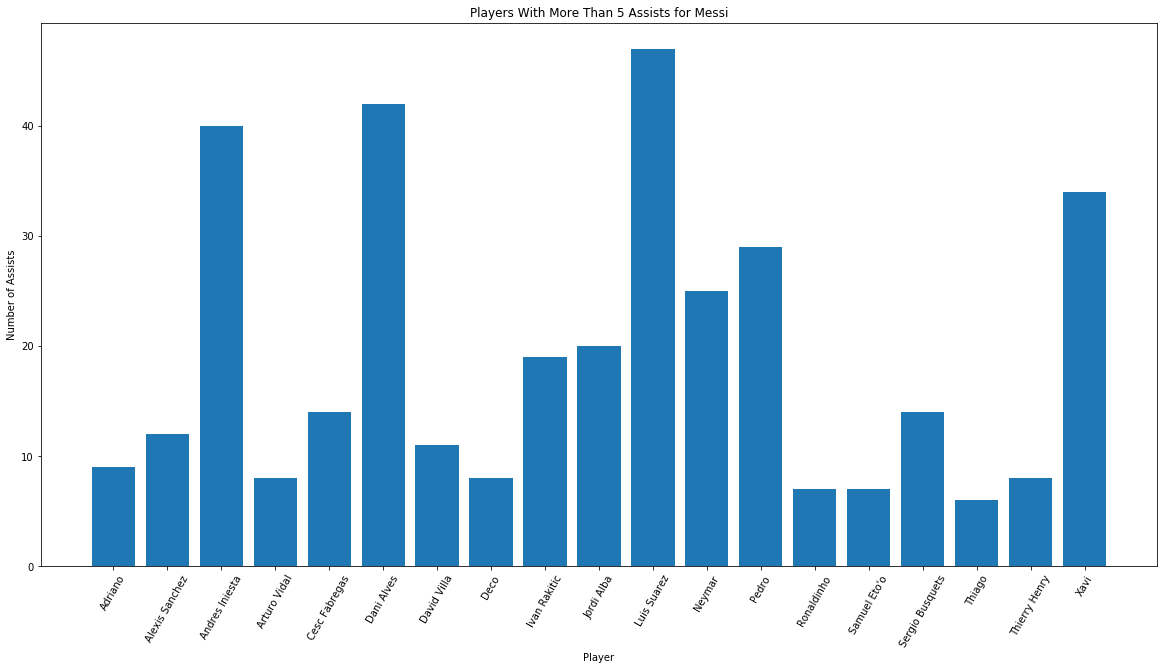

In [5]:
players = []
with open("clean_data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader:
      players.append(lines[2])

playersClean = []
for i in players:
    if i not in playersClean and i is not '' and players.count(i) > 5:
        playersClean.append(i)

numAssists = []
for i in playersClean:
    numAssists.append(players.count(i))
        
pos = []
for i in range(len(playersClean)):
    pos.append(i)

plt.figure(figsize=(20,10))
plt.bar(pos, numAssists)
plt.xlabel('Player')
plt.ylabel('Number of Assists')
plt.xticks(pos, playersClean, rotation=60)
plt.title('Players With More Than 5 Assists for Messi')
plt.show()
        
